In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('dataset/telecom_customer_churn.csv')
df.head(3)

,viewer_id,gender,age,married,number_of_family_dependents,city,zip_code,latitude,longitude,number_of_referrals,...,subscription_type,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,viewer_status
0,0002-ORFBO,Female,37,Yes,0,SD,93225,34.827662,-118.999073,2,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,0003-MKNFE,Male,46,No,0,SD,91206,34.162515,-118.203869,0,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,0004-TLHLJ,Male,50,No,0,SD,92627,33.645672,-117.922613,0,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned


# EDA

In [6]:
### Determine the outlier of numerical variables

In [7]:
def compute_outlier(col_name):
    Q1 = np.percentile(df[col_name],25)
    Q3 = np.percentile(df[col_name],75)
    upper = Q3 + 1.5 * (Q3 - Q1)
    lower = Q1 - 1.5 * (Q3 - Q1)
    outlier_per = len(df[(df[col_name] > upper) | (df[col_name] < lower)])/len(df)
    return outlier_per

In [8]:
df.describe()

,age,number_of_family_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,5244.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,46.757438,0.476169,93491.512750,36.199980,-119.757549,2.021099,34.494232,26.228261,65.023915,2431.211611,2.081254,7.170613,798.101053,3234.402023
std,16.840793,0.968555,1857.716269,2.472582,2.155838,3.024220,23.966333,19.566861,31.098217,2264.668413,8.125630,25.804970,853.832041,2854.047975
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,2.000000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,0.000000,92103.000000,33.989286,-121.790034,0.000000,12.000000,13.000000,35.800000,544.362500,0.000000,0.000000,106.665000,835.407500
50%,46.000000,0.000000,93526.000000,36.245926,-119.601370,0.000000,32.000000,21.000000,71.025000,1562.700000,0.000000,0.000000,472.240000,2375.925000
75%,60.000000,0.000000,95333.250000,38.169605,-117.967399,3.000000,57.000000,30.000000,90.400000,3998.350000,0.000000,0.000000,1275.872500,5105.207500
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [9]:
num = ['age', 'number_of_family_dependents', 'number_of_referrals', 'tenure_in_months', 'avg_monthly_gb_download',
      'monthly_charge', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges',
      'total_revenue']

dic = {}
for name in num:
    dic[name] = compute_outlier(name)

In [10]:
outlier_percentage = pd.DataFrame(dic.items(), columns = ['Numerical Variable','Outlier %']).sort_values('Outlier %', ascending = False)
outlier_percentage

,Numerical Variable,Outlier %
1,number_of_family_dependents,0.234821
8,total_extra_data_charges,0.103825
2,number_of_referrals,0.098512
7,total_refunds,0.078931
9,total_long_distance_charges,0.020644
10,total_revenue,0.001366
0,age,0.000000
3,tenure_in_months,0.000000
4,avg_monthly_gb_download,0.000000
5,monthly_charge,0.000000


In [11]:
### Take a look at variable that has outlier percentage greater than 5%

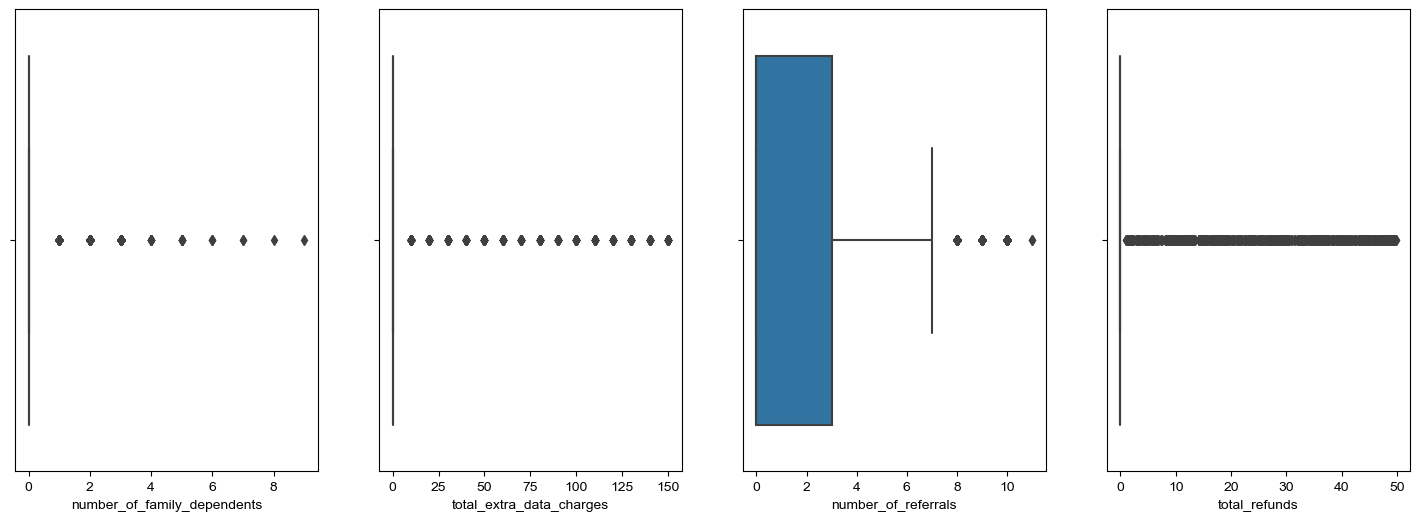

In [12]:
fig, ax = plt.subplots(1,4,figsize=(18,6))
sns.set_style('whitegrid')
for i, name in enumerate(['number_of_family_dependents', 'total_extra_data_charges', 'number_of_referrals', 'total_refunds']):
    sns.boxplot(x=df[name], ax=ax[i])



Since the pattern of outlier for number_of_family_dependents, total_extra_data_changes, and total_refuns are uniform, it doesn't seem like this is a typo or extreme case. However, the number of referrals shows small portion of extreme case and relatively small amount of data points, so we could replace it with its mean

In [13]:
df.loc[df['number_of_referrals']>7, 'number_of_referrals'] = df['number_of_referrals'].mean()

Now we are moving to the number of NA in the dataset by creating a dataframe that ranked the percentage of na in each variable

In [14]:
na_percent = pd.DataFrame(df.isna().sum()/len(df)*100, columns = ['na%']).sort_values('na%', ascending=False)
na_percent

,na%
online_backup,20.400729
streaming_tv,20.400729
device_protection_plan,20.400729
streaming_movies,20.400729
online_security,20.400729
avg_monthly_gb_download,20.400729
internet_type,20.400729
streaming_music,20.400729
unlimited_hi-res_streaming,20.400729
premium_tech_support,20.400729


since there are multiple columns with the 20.4% of NAs, we could assume they are the same fields across those attributes. As shown, all these columns are YES or NO columns, and we need to figure out the distribution of YES in their columns to guide our way to impute the null values. 

As stated in the dataset info, the only numerical variable in the dataframe that contains NA is 'avg_monthly_gb_download', so before imputing missing values, we need to figure out its distribution.

<Axes: xlabel='avg_monthly_gb_download', ylabel='Count'>

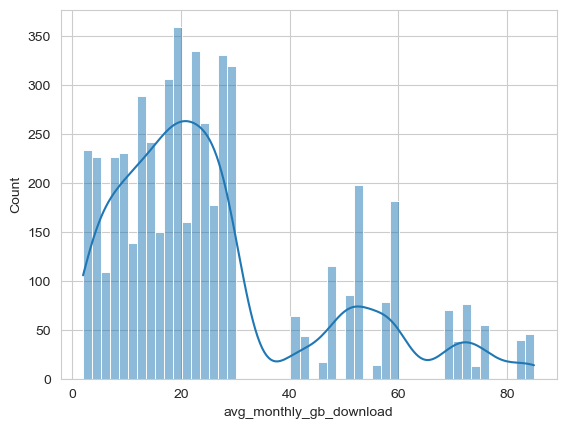

In [15]:
sns.histplot(x=df['avg_monthly_gb_download'], bins = 50, kde=True)

Since the distribution is rather random and right skewed, I decided to impute the missing values using median

In [16]:
df['avg_monthly_gb_download'] = df['avg_monthly_gb_download'].fillna(df['avg_monthly_gb_download'].median())

In [17]:
for col in na_percent[na_percent['na%']!=0].index.values:
    print(col, len(df[df[col]=='No'])/len(df))

online_backup 0.4356405585913783
streaming_tv 0.3926836672738312
device_protection_plan 0.4333636915604129
streaming_movies 0.3888888888888889
online_security 0.49666059502125076
avg_monthly_gb_download 0.0
internet_type 0.0
streaming_music 0.426381299332119
unlimited_hi-res_streaming 0.10989678202792957
premium_tech_support 0.4930176077717061


Since the distirbution of YES across these columns are uneven, it makes no sense to arbitrarily assign 'YES' or 'NO' to the missing values. We cannot compute the null by the mode since the distribution of YES and NO are not random, also we cannot drop all the missing values since it will cost us 20% of total data. So we decide to turn NaN values to a third type of values which is 'Unknown'. The only exceptions are avg_monthly_gb_downloads and internet type, in which the placeholder 'Unknown' applied to internet type as well and avg_monthly_gb_downloads is imputed using its average.

In [18]:
df = df.fillna('Unknown')

Now we are going to visualize some of the interested factor that might be related to the churning of a customer based on domain knowledge.We only care about the part of customer that currently has internet service. Right now, the target column 'Viewer Status' will be converted to 1 and 0 for easier visualization

In [19]:
df_vis = df[df['internet_service'] == 'Yes']

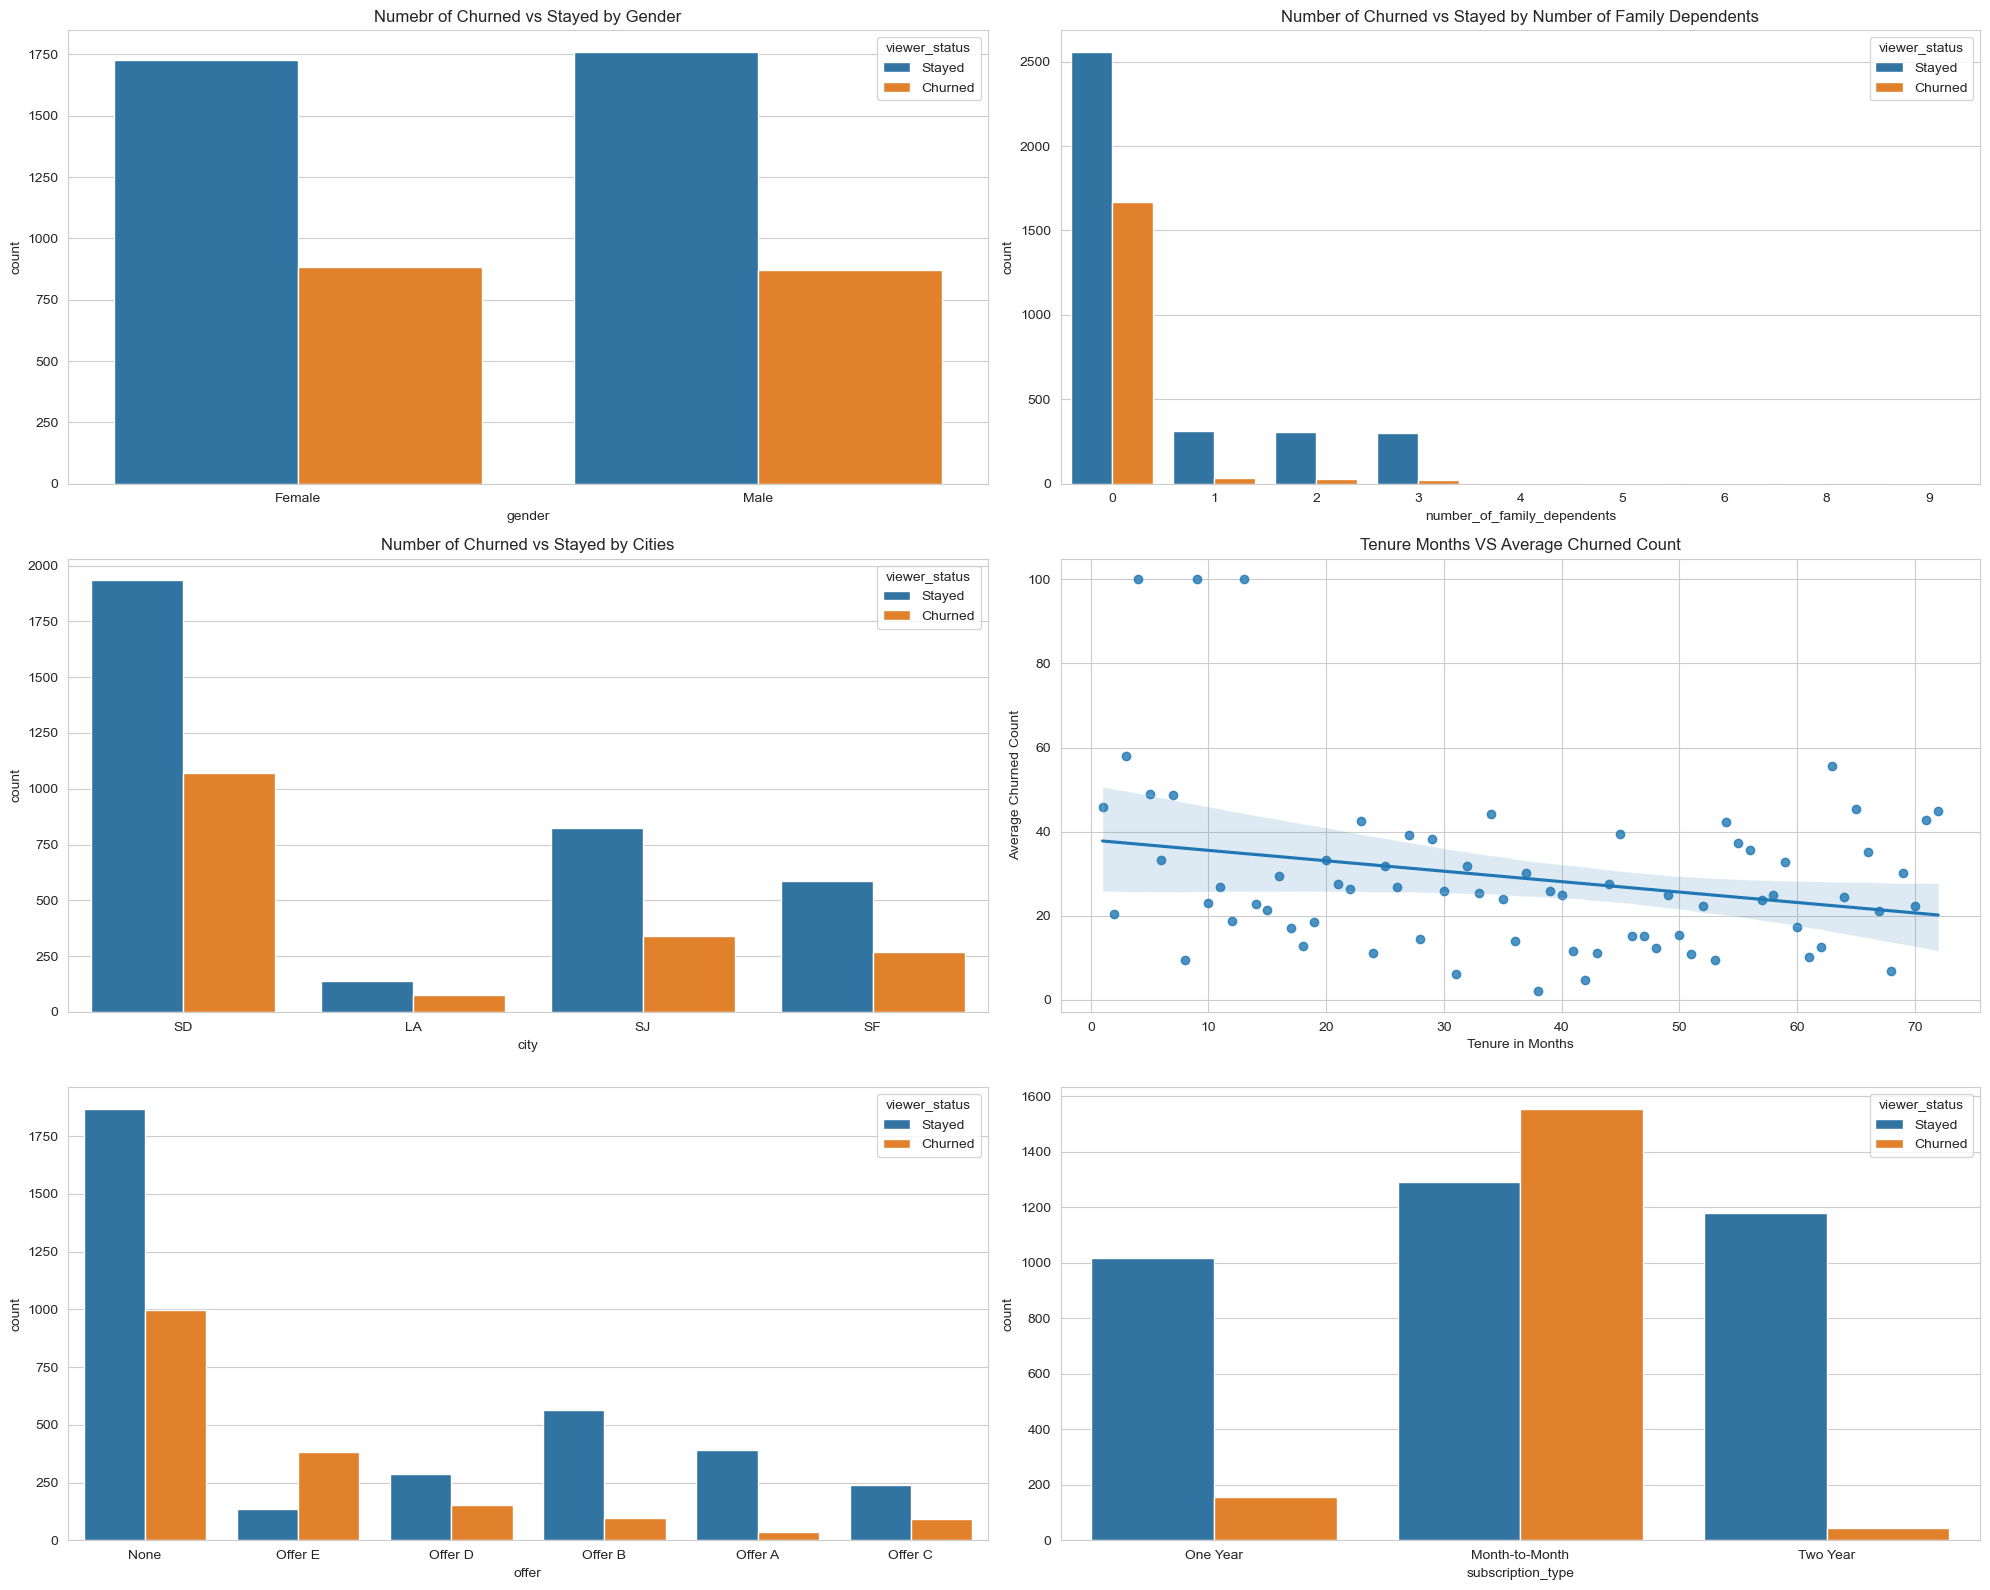

In [20]:
fig, ax = plt.subplots(3,2, figsize=(20,16))
sns.countplot(x=df_vis['gender'], hue = df_vis['viewer_status'], ax=ax[0,0])
sns.countplot(x=df_vis['number_of_family_dependents'], hue=df_vis['viewer_status'], ax=ax[0,1])
sns.countplot(x=df_vis['city'], hue=df_vis['viewer_status'], ax=ax[1,0])

yy = df_vis[df_vis['viewer_status']=='Churned'].groupby('tenure_in_months').count()['viewer_status']
sns.regplot(x=df_vis['tenure_in_months'].unique(), y=yy/df_vis.groupby('tenure_in_months').size()*100, ax=ax[1,1])
ax[0,0].set_title('Numebr of Churned vs Stayed by Gender')
ax[0,1].set_title('Number of Churned vs Stayed by Number of Family Dependents')
ax[1,0].set_title('Number of Churned vs Stayed by Cities')
ax[1,1].set_title('Tenure Months VS Average Churned Count')
ax[1,1].set_xlabel('Tenure in Months')
ax[1,1].set_ylabel('Average Churned Count')
sns.countplot(x=df_vis['offer'],hue=df_vis['viewer_status'],ax=ax[2,0])
sns.countplot(x=df_vis['subscription_type'], hue=df_vis['viewer_status'], ax=ax[2,1])
plt.tight_layout()

From the visualization we have the following insights:
1. The gender and City of a customer doesn't seem to have an effect on churned rate.

2. we could see that as the number of family dependents goes up to above 0, the churn rate decreases dramatically, indicating that customer who are single are more likely to churn that those who already form a family.

3. The scatterplot shows that there is a weak negative correlation between tenure in months and average churn rate, which makes sense since more tenure months means higher loyalty with the company, so less likely to leave.

4. We could see out of all the offers, offers E got abnormally higher churn than stayed compared to other plan, which is interesting. Also out of all subscription type, month to month got the highest churn rate.

# Data Preprocessing for Model Preparation

for the model we only need the customer that currently have internet services. Also viewer Id should be dropped since it is just a primary key

In [22]:
df_m = df_vis
num_col = df_m.select_dtypes(include=['number']).columns.values
cat_col = df_m.select_dtypes(exclude=['number']).columns.values
cat_col = cat_col[cat_col != 'viewer_id']

In [23]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse_output = False)

a = pd.DataFrame(scaler.fit_transform(df_m[num_col]), columns = num_col)
b = pd.DataFrame(encoder.fit_transform(df_m[cat_col]), columns = encoder.get_feature_names_out(cat_col))

df_m = pd.concat([a,b], axis=1)

In [25]:
df_m.head(2)

,age,number_of_family_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,...,subscription_type_Month-to-Month,subscription_type_One Year,subscription_type_Two Year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,viewer_status_Churned,viewer_status_Stayed
0,0.295082,0.0,0.524313,0.241523,0.524540,0.285714,0.112676,0.168675,0.587184,0.065792,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.442623,0.0,0.195967,0.170810,0.603207,0.000000,0.112676,0.096386,0.046602,0.059916,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


From now on we need to decompose the data using PCA before feeding into K mean cluster. For the optimal number of clusters and K we could run elbow method for each one of them and select the optimal one.

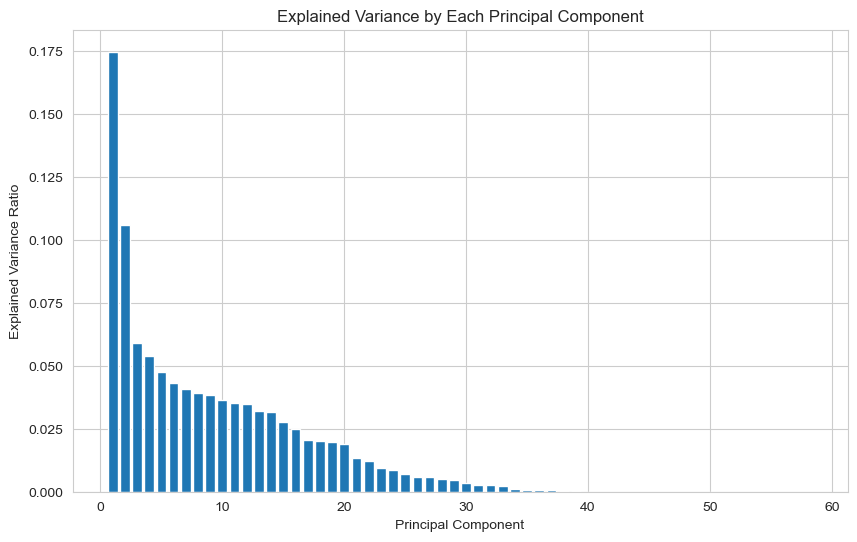

Number of Principal Component to cover at least 95% of variance is:  24


In [37]:
from sklearn.decomposition import PCA

# Perform PCA without reducing dimensionality to find explained variance of each component
pca_graph = PCA()
pca_graph.fit(df_m)

# Get the explained variance ratio
explained_variance_ratio = pca_graph.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()


pca = PCA().fit(df_m)
explained_var = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_var >= 0.95) + 1 
print('Number of Principal Component to cover at least 95% of variance is: ', n_components)


In [42]:
pca_op = PCA(n_components = 24)
df_pca = pca_op.fit_transform(df_m)

In [43]:
from sklearn.cluster import KMeans
inertia = []
cluster_range = range(1,11)
for k in cluster_range:
    models = KMeans(n_clusters = k, random_state =42)
    models.fit(df_pca)
    inertia.append(models.inertia_)

/Users/sunnypzz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sunnypzz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sunnypzz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sunnypzz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

<Axes: >

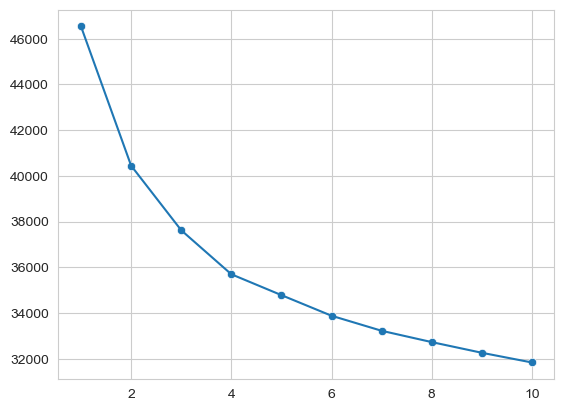

In [44]:
sns.lineplot(x=cluster_range, y=inertia)
sns.scatterplot(x=cluster_range, y=inertia)

Based on elbow method illustration, the elbow is located on the cluster number 4 so that makes it the optimal number of cluster to do the clustering analysis. I will then make a clustering using 4 clusters and assign the label of cluster back to the original dataset to analyze customer profile

In [53]:
k_op = KMeans(n_clusters = 4, random_state = 42)
k_op.fit(df_pca)
k_op.labels_

# Assign the cluster label back to the original dataset 
df_cluster = df_vis
df_cluster['Cluster Label'] = k_op.labels_

/Users/sunnypzz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/_2/47pvc7c50m55gyqf8fg6frzm0000gn/T/ipykernel_99496/2553744391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster Label'] = k_op.labels_


Text(0.5, 1.0, 'Stayed vs Churned Grouping by Clustering Label')

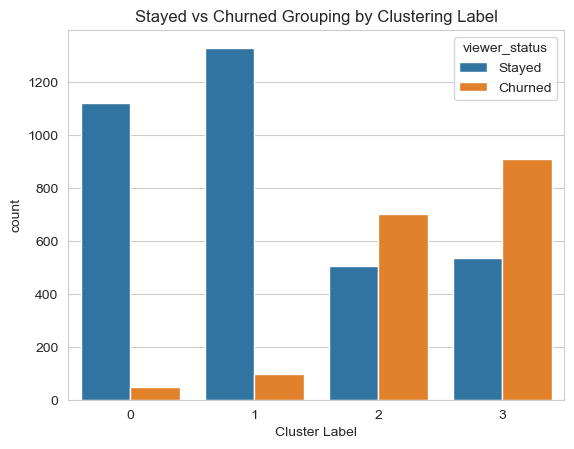

In [60]:
sns.countplot(x=df_cluster['Cluster Label'], hue=df_cluster['viewer_status'])
plt.title('Stayed vs Churned Grouping by Clustering Label')

From here we could see that obviously cluster 1 and 2 have very little churned but for cluster 3 and 4 customer are more inclined to churn. For the sake of simplicity, we will just see how the numerical customer profile are different between these four clusters

In [70]:
df_cluster.select_dtypes(include=['number']).columns.values

array(['age', 'number_of_family_dependents', 'zip_code', 'latitude',
       'longitude', 'number_of_referrals', 'tenure_in_months',
       'avg_monthly_gb_download', 'monthly_charge', 'total_charges',
       'total_refunds', 'total_extra_data_charges',
       'total_long_distance_charges', 'total_revenue', 'Cluster Label'],
      dtype=object)

In [72]:
df_cluster[df_cluster.select_dtypes(include=['number']).columns.values].groupby('Cluster Label').mean()

,age,number_of_family_dependents,zip_code,latitude,longitude,number_of_referrals,tenure_in_months,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue
Cluster Label,,,,,,,,,,,,,,
0,47.076989,0.600513,93478.792130,36.229093,-119.727719,1.972092,42.363559,26.925577,65.610693,2942.460821,2.784876,10.094098,903.506792,3853.276835
1,45.925718,0.557113,93530.854240,36.256061,-119.817843,2.071346,56.854940,28.566924,89.569096,5256.728837,2.169916,10.399439,1311.197162,6576.155522
2,48.364842,0.199834,93467.085406,36.101992,-119.669773,0.720644,25.012438,25.045605,85.273756,2220.965713,2.056169,9.875622,584.037231,2812.822396
3,49.408460,0.233010,93430.961859,36.061945,-119.661837,0.485314,13.898752,24.337725,64.622573,964.500312,1.633599,6.026352,317.316234,1286.209300


we could see that based on the average of numerical profile, the result aligns with our EDA in which those with larger number_of_family_dependent, higher tenure months, and higer number of referrals are less likely to churn. The new finding is that those with higher refund, total long distance charges, and total_revenue will have less churn rate too.

In [82]:
cat_en

<5244x5288 sparse matrix of type '<class 'numpy.float64'>'
	with 99636 stored elements in Compressed Sparse Row format>

In [88]:
df_vis.select_dtypes(exclude=['number']).columns

Index(['viewer_id', 'gender', 'married', 'city', 'offer', 'internet_service',
       'internet_type', 'online_security', 'online_backup',
       'device_protection_plan', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_hi-res_streaming',
       'subscription_type', 'paperless_billing', 'payment_method',
       'viewer_status'],
      dtype='object')

In [107]:
encoder = OneHotEncoder(sparse = False)

cat_col = df_vis.select_dtypes(exclude=['number']).columns.values
cat_col = cat_col[cat_col!='viewer_id']

cat_en = encoder.fit_transform(df_vis[cat_col])

df_cat = pd.DataFrame(cat_en, columns = encoder.get_feature_names_out(cat_col))
df_cat['Cluster'] = k_op.labels_
df_cat.groupby('Cluster').sum()

/Users/sunnypzz/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_Female,gender_Male,married_No,married_Yes,city_LA,city_SD,city_SF,city_SJ,offer_None,offer_Offer A,...,subscription_type_Month-to-Month,subscription_type_One Year,subscription_type_Two Year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,viewer_status_Churned,viewer_status_Stayed
Cluster,,,,,,,,,,,,,,,,,,,,,
0,549.0,620.0,436.0,733.0,55.0,627.0,193.0,294.0,638.0,108.0,...,362.0,460.0,347.0,570.0,599.0,569.0,551.0,49.0,48.0,1121.0
1,734.0,693.0,409.0,1018.0,53.0,798.0,248.0,328.0,725.0,308.0,...,113.0,523.0,791.0,489.0,938.0,801.0,590.0,36.0,98.0,1329.0
2,599.0,607.0,745.0,461.0,45.0,717.0,197.0,247.0,709.0,10.0,...,1008.0,152.0,46.0,221.0,985.0,945.0,223.0,38.0,702.0,504.0
3,729.0,713.0,1042.0,400.0,61.0,863.0,219.0,299.0,796.0,1.0,...,1363.0,40.0,39.0,388.0,1054.0,993.0,350.0,99.0,908.0,534.0


we could also sees that married or not, Month to Month Subscription, payment_method are also some important categorical variable.

# Supervised Machine Learning Model

In [221]:
df_pred = df[df['internet_service'] == 'Yes']
df_pred = df_pred.iloc[:, :-1]
df_pred.drop('viewer_id', axis=1,inplace=True)

In [225]:
scaler = MinMaxScaler()
encoder = OneHotEncoder(sparse_output = False)

num_col = df_pred.select_dtypes(include=['number']).columns.values
cat_col = df_pred.select_dtypes(exclude=['number']).columns.values

a = pd.DataFrame(scaler.fit_transform(df_pred[num_col]), columns = num_col)
b = pd.DataFrame(encoder.fit_transform(df_pred[cat_col]), columns = encoder.get_feature_names_out(cat_col))

df_pred = pd.concat([a,b],axis=1)

# Feature Selection for Logistic Regression

For the logistic regression, the features are selected based on the combination of insight coming from clustering analysis and EDA, since logistic regression essentially squeeze the linear equation function into a logit function, so we have to avoid collinearity between variables

For example, as EDA suggested, as one get at least one family memeber, its churn rate will dramatically decreases, so we only need to include the married variable instead of adding number of family dependents. Also, total_revenue is the linear transformation of refunds, total charges, total extra charges, and total long distance charges, so we only need to include total revenue.

For the categorical varible, some of them are shown to be related to churn in EDA and clustering analysis.




For Random Forest, since the model inherently helps feature selection, I would rather include all the features to let it figure out what are the importance features so I could compare to my own feature selections.

In [233]:
selected_feature_for_lg = ['married', 'number_of_referrals', 'tenure_in_months','offer', 'online_security', 'online_backup',
                          'device_protection_plan', 'premium_tech_support', 'streaming_tv','streaming_movies','streaming_music',
                          'unlimited_hi-res_streaming', 'subscription_type', 'payment_method', 'monthly_charge', 'total_revenue']

In [234]:
df_lg = df[df['internet_service']=='Yes']
df_lg_pred = df_lg[selected_feature_for_lg]
num_col = df_lg_pred.select_dtypes(include=['number']).columns.values
cat_col = df_lg_pred.select_dtypes(exclude=['number']).columns.values

a = pd.DataFrame(scaler.fit_transform(df_lg_pred[num_col]), columns = num_col)
b = pd.DataFrame(encoder.fit_transform(df_lg_pred[cat_col]), columns = encoder.get_feature_names_out(cat_col))

df_lg_pred = pd.concat([a,b], axis = 1)

To avoid overfitting, I limit the complexity of the tree by limiting the max_depth, min_samples_split, and min_sample_leaf. For logistic regression I did regularization of C = 0.2

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



X, y = df_pred, df[df['internet_service']=='Yes']['viewer_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Xl, yl = df_lg_pred, df[df['internet_service']=='Yes']['viewer_status']

X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(Xl, yl, test_size=0.2, random_state=42)



logistic_model = LogisticRegression(C=0.2)
logistic_model.fit(X_train_lg, y_train_lg)

# Make predictions and evaluate Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test_lg)
accuracy_logistic = accuracy_score(y_test_lg, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")

# Initialize and fit Random Forest model
random_forest_model = RandomForestClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
random_forest_model.fit(X_train, y_train)

# Make predictions and evaluate Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Logistic Regression Accuracy: 0.8112488083889419
Random Forest Accuracy: 0.8017159199237369


The accuracy metric for both models are pretty similar, which is a decent result considering the limit of overfitting. it also indicates that my feature selected for logistic regression should be covering most of the variance of the data

# Business Insight and Recommendation

Since churned is marked as 1 so to rank importance of coefficient we need to do a ascending order of coefs. Also because of encoded columns, the coef name could just be interpreted by its original meaning. For example, offer-OfferD could be just considered as OFFER effects on churn.

Since RF does a different way of representing its feature importance, so a desceding order of importance is more appropriate. 

From both model we could see that they share the varibles: number of referrals, tenure_in_months, subscription type. So My recommendation to the service company is to find ways to boost numebr of referrals or provide more attractive subscription type for customer so they will be less likely to churn. Also, the offers and payment method matter too as those uses credit cards are less likely to churn and those with offer E is very likely to churn, so the company should plan accordingly to prevent churning. One last thing is that trying to make customer subscribed more than month to month will prevent churning too.

In [246]:
lg_feature_imp = pd.DataFrame({'Feature Name': df_lg_pred.columns.values, 'Feature Importance by LG': logistic_model.coef_[0]})
lg_feature_imp.sort_values('Feature Importance by LG', ascending = True).iloc[:5,:]

,Feature Name,Feature Importance by LG
0,number_of_referrals,-2.552518
1,tenure_in_months,-1.896302
30,subscription_type_Two Year,-1.212552
10,offer_Offer D,-0.687047
32,payment_method_Credit Card,-0.446266


In [247]:
lg_feature_imp = pd.DataFrame({'Feature Name': df_pred.columns.values, 'Feature Importance by RF': random_forest_model.feature_importances_})
lg_feature_imp.sort_values('Feature Importance by RF', ascending = False).iloc[:5,:]

,Feature Name,Feature Importance by RF
6,tenure_in_months,0.190107
48,subscription_type_Month-to-Month,0.142932
9,total_charges,0.123169
13,total_revenue,0.109139
5,number_of_referrals,0.074167
